In [1]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     if not os.path.isdir(housing_path):
#         os.makedirs(housing_path)
#         tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()
# fetch_housing_data()

In [2]:
# os.remove(HOUSING_PATH + "/housing.tgz")

In [3]:
import pandas as pd
import numpy as np

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()

## 3、观察数据

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc09eab5358>,
      dtype=object)

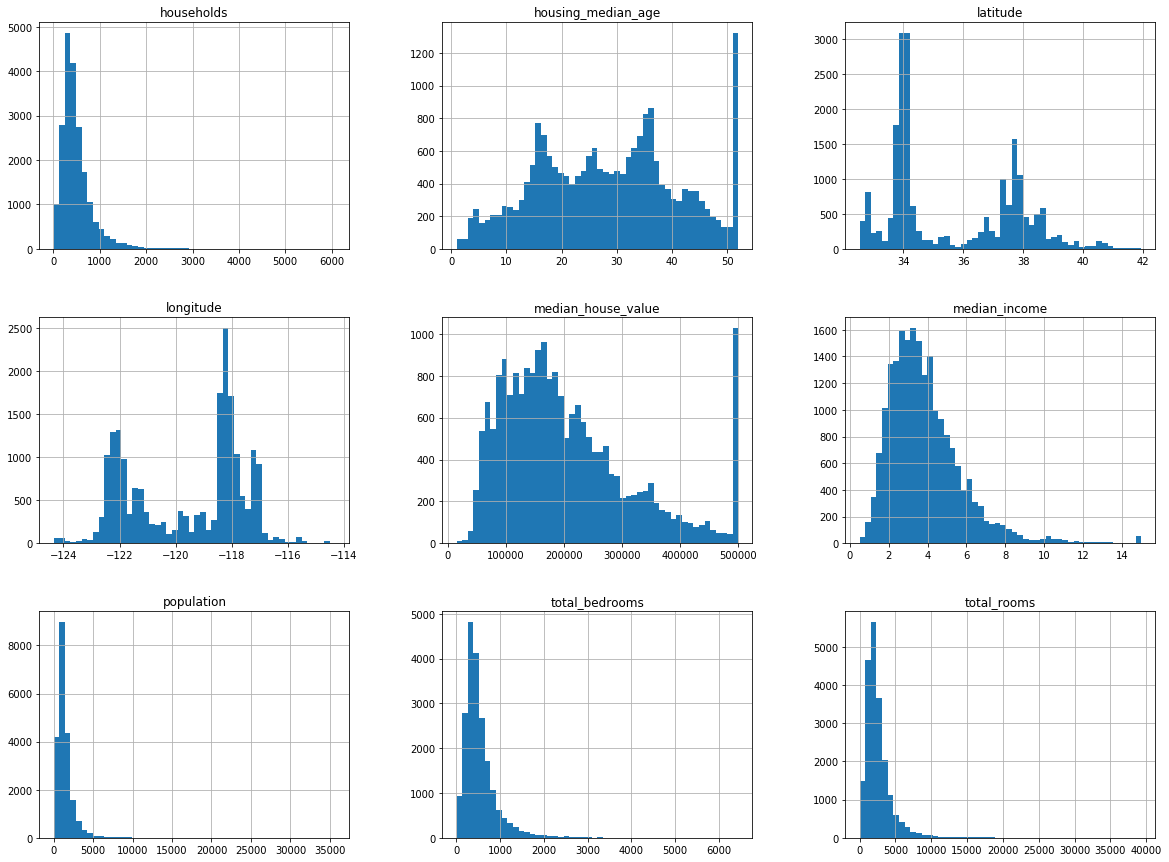

In [10]:
housing.hist(bins=50, figsize=(20,15))

## 4、分开训练和测试集

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

纯随机采样，如果样本很大，则能表现良好，如果样本比较少，则会有采样偏差的风险。比如要对1000个人做问卷调查，社会人口男女比例为51.3%和48.7%，则采样人数按照这个比例，则应该为513和487，这就是分层采样。如果纯随机采样（即上述按行号，识别码的随机采样），则有12%的可能测试集中女性少于49%或男性多于54%。这样的话就会产生采样偏差。因此sklearn提供了另一个函数StratifiedShuffleSplit（分层随机采样）  

继续从真实数据来看，假设专家告诉你median_income 是用于预测median housing price一个很重要的特征，则你想把median_income作为划分的准则来观察不同的median_income对median housing price的影响。但是可以看到median_income是连续实数值。所以需要把median_income变为类别属性。

根据之前显示的图标表，除以1.5界分为5类，除了以后大于5的归为5，下面图片可以上述说过的hist()函数画出来看看，对比一下原来的median_income的分布，看是否相差较大，如果较大，则界需要调整。

In [12]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

In [13]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

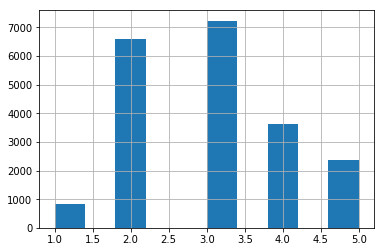

In [14]:
housing["income_cat"].hist()

接下来就可以根据上面分号层的”income_cat”使用StratifiedShuffleSplit函数作分层采样，其中n_splits为分为几组样本（如果需要交叉验证，则n_splits可以取大于1，生成多组样本），其他参数和之前相似。

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

由于income_cat特征只是我们用于划分的特征，对训练没有任何作用，所以最后需要将加入的income_cat删除

In [16]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

## 5、查看训练集的特征图像信息以及特征之间的相关性

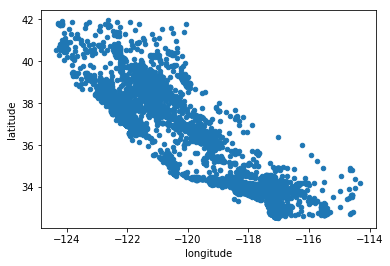

In [17]:
#************************
#对原始数据未做任何处理的训练数据（分层采样之后的结果）train_housing为增加三个列之后的结果
#************************
train_housing = strat_train_set.copy()  #防止误操作修改了训练集 可以直接利用最终管道进行处理
train_housing.plot(kind="scatter", x="longitude", y="latitude") #经度，纬度

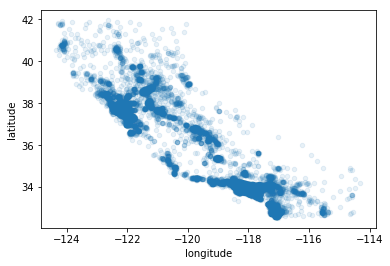

In [18]:
train_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # alpha=0.1可以看到数据高密度区域

In [19]:
# %matplotlib notebook
import seaborn as sns

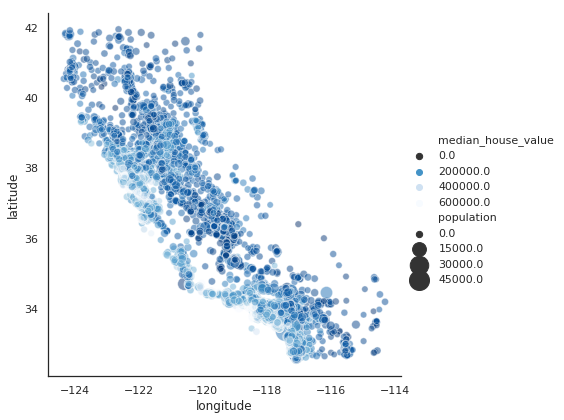

In [20]:
sns.set(style="white")

sns.relplot(x="longitude", y="latitude", hue="median_house_value",size="population", sizes=(40, 400),
           alpha=.5,  height=6, palette="Blues_r",data=train_housing)

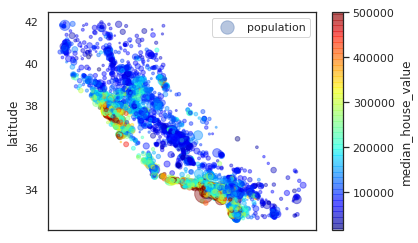

In [21]:
train_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

### 查看特征之间的相关性

In [22]:
corr_matrix = train_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

/home/jimmyli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc089fe9320>,
      dtype=object)

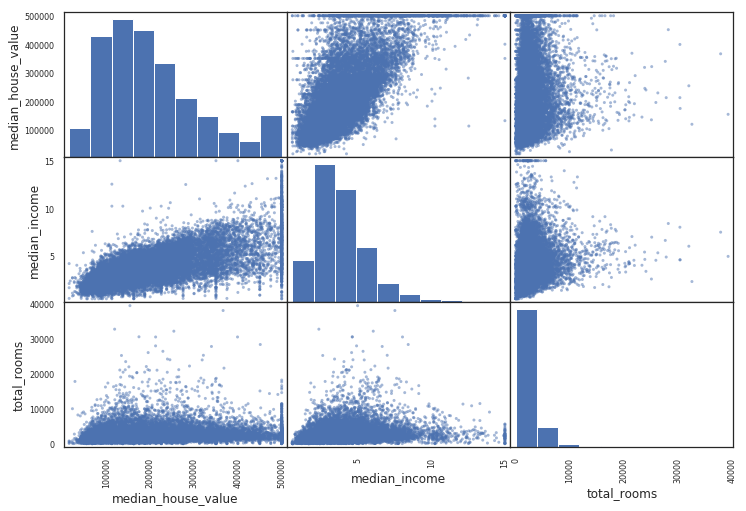

In [23]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms"]
scatter_matrix(housing[attributes], figsize=(12, 8))

### **特征之间的组合**

In [24]:
train_housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
train_housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
train_housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = train_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 6、准备数据（数据预处理）

数据集分为特征(feature)和目标标签(label)

In [25]:
train_housing_feature = strat_train_set.drop("median_house_value", axis=1)
train_housing_labels = strat_train_set["median_house_value"].copy()

### **数据清洗**

 当然非常方便的Scikit-Learn也存在对缺失值处理的类Imputer。我们打算对所有地方的缺失值都补全，以防运行模型时发生错误。使用Imputer函数需要先定义一个补缺失值的策略（如median），由于median策略只能对实数值有效，所以需要将文本属性先去除，然后再补缺失值。最后使用fit方法对变量执行相应操作。

In [26]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
housing_num = train_housing.drop("ocean_proximity", axis=1)  #  可以直接利用管道对其处理 加入三列之后的结果
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

数据缺失补全后，一般需要转化为Numpy的矩阵格式，方便模型的输入

In [27]:
X = imputer.transform(housing_num)
#X = imputer.fit_transform(housing_num)
#也可以将numpy格式的转换为pd格式
#housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [28]:
housing.shape  #最接近原始数据，但是加了一列income_cat用于分层

(20640, 11)

In [29]:
strat_train_set.shape  #分层抽样的训练集数据，与原始数据一致

(16512, 10)

In [30]:
train_housing_feature.shape  #在前者的基础上，去掉median_house_value，只保留feature

(16512, 9)

In [31]:
train_housing.shape  #在strat_train_set的基础上加了三列

(16512, 13)

In [32]:
housing_num.shape  #在前者的基础上去掉了ocean_proximity这一列

(16512, 12)

### **处理文本类特征**

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = train_housing_feature["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

由于0到1的距离比0到3的距离要近，所以这种数字编码暗含了0和1的相似性比0到3的相似性要强，然而事实上并非如此，每个元素的相似性应趋于相等。
如果该数字编码作为label，则只是一个标签，没有什么影响。但是如果用于特征，则这种数字编码不适用，应该采用one hot编码

In [34]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

也可以一步到位，直接从文本编码到one hot，对应Scikit-Learn中的类为LabelBinarizer

In [35]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat) #要注意的是，不设参数sparse_output=True的话，默认输出的是Numpy矩阵。

In [36]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### 自定义Transformer

由于Scikit-Learn中的函数中提供的Transformer方法并一定适用于真实情形，所以有时候需要自定义一个Transformer，与Scikit-Learn能够做到“无缝结合”， 比如pineline。定义类时需要加入基础类：BaseEstimator(必须)， 以及TransformerMixin(用于自动生成fit_transformer()方法）。下面是一个例子：用于增加组合特征的Transformer

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [38]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

### 特征缩放

由于机器学习算法在不同尺度范围的特征之间表现的不好，比如total number of rooms范围是6-39320，而median_incomes范围是0-15。因此需要对特征的范围进行缩放，对应Scikit-Learn中的类为：

  1、MinMaxScaler：将特征缩放到0-1之间，但异常值对这个影响比较大，比如异常值为100，缩放0-15为0-0.15;

  2、feature_range：可以自定义缩放的范围，不一定是0-1;

  3、StandardScaler：标准化（减均值，除方差），对异常值的影响较小，但可能会不符合某种范围

  需要注意：每次缩放只能针对训练集或只是测试集，而不能是整个数据集，这是由于测试集（或新数据）不属于训练范围。

### Transformation Pipelines

可以看到，上述有非常多的转换操作，并按一定的顺序执行，但是再次处理其他数据（如测试数据）时需要重新调用执行众多步骤，代码看起来过于繁琐。所以Scikit-Learn提供了Pineline类来帮助这种一系列的转换，把这些转换封装为一个转换。下面是一个简单的例子。

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

Pipeline是由（name(名字)，Estimator(类)）对组成，但最后一个必须为transformer（我的理解是每个类必须包含transform方法），这是因为要形成fit_transform()方法  
上面的pineline只是用于处理实数特征的，对于处理类别特征的还有另一个Pineline，这就可以使用FearureUnion类来结合多个pineline，多个Pineline可以并行处理，最后将结果拼接在一起输出。  
由于Scikit-Learn没有处理Pandas数据的DataFrame，因此需要自己自定义一个如下：

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

然后就可以通过FeatureUnion类结合两个Pineline

  需要注意：在scikit-learn == 0.18.0及以前版本LabelBinarizer()用在Pineline没有问题；而在0.19.0版本则会报错，因此需要自己定义一个新的LabelBinarizer_new()，代码如下；0.20.0版本以后可以使用新的类CategoricalEncoder()

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
class LabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        self.encoder = None
        return self
    def transform(self, X, y = 0):
        if(self.encoder is None):
            print("Initializing encoder")
            self.encoder = LabelBinarizer();
            result = self.encoder.fit_transform(X)
        else:
            result = self.encoder.transform(X)
        return result

In [42]:
from sklearn.pipeline import FeatureUnion
num_attribs = list(train_housing_feature)[: -1]
cat_attribs = list(train_housing_feature)[-1]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),     
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer_new()),
])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])
housing_prepared = full_pipeline.fit_transform(train_housing_feature)

Initializing encoder


In [43]:
train_housing_prepared = housing_prepared.copy()

In [44]:
%store train_housing_prepared 

Stored 'train_housing_prepared' (ndarray)


In [45]:
%store train_housing_labels

Stored 'train_housing_labels' (Series)


In [46]:
train_housing_prepared.shape

(16512, 16)